In [8]:
from splinter import Browser
from splinter.exceptions import ElementDoesNotExist
from bs4 import BeautifulSoup
import requests
import pandas as pd
from selenium import webdriver as driver
import matplotlib as plt

In [9]:
#logic in this cell scrapes the data, cleans it up and put it in a dataframe called new_df

tables = pd.read_html("https://www.nps.gov/aboutus/visitation-numbers.htm")
visit = tables[2]
new_df = pd.DataFrame([{"Year":"","Visitors":""}])
new_df.head()
# create a list to store the year values
years = []
# create a list to store the visitor values
visitors = []


visit

# iterate over every row in the data
for index, row in visit.iterrows():
    # iterate over every column in the row
    for i in range(0,row.size):
        # if the column position is divisible by 2
        if i % 2 == 0:
            # add to year list
            years.append(row[i])
        else:
            # else add to visitor list
            #visitors.append(str(row[i]).replace(".",""))
            visitors.append((str(row[i]).replace(".0","")).replace(".",""))

#years
new_df = pd.DataFrame(years, visitors).reset_index()
new_df.dropna(inplace=True)
new_df.info()



new_df = new_df[new_df['index']!='nan']
# new_df = new_df.rename(columns={"index":"Visitors", 0:"Year"})
# new_df["Visitors"] = pd.to_numeric(new_df["Visitors"])

new_df.info()

new_df

new_df = new_df.rename(columns={"index":"Visitors", 0:"Year" })
new_df.head()

new_df = new_df[new_df.Year != "Total"]
#df.drop('reports', axis=1)
#df[df.name != 'Tina']

new_df["Visitors"]=pd.to_numeric(new_df["Visitors"])
new_df["Year"]=pd.to_numeric(new_df["Year"])

new_df = new_df.sort_values(by=['Year'])

new_df



<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 128
Data columns (total 2 columns):
index    116 non-null object
0        116 non-null object
dtypes: object(2)
memory usage: 2.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 128
Data columns (total 2 columns):
index    116 non-null object
0        116 non-null object
dtypes: object(2)
memory usage: 2.7+ KB


,Visitors,Year
0,120690,1904
5,140954,1905
10,30569,1906
15,32935,1907
20,42768,1908
25,60899,1909
30,173416,1910
35,194207,1911
40,198334,1912
45,216853,1913


In [7]:
tables[2]

,0,1,2,3,4,5,6,7,8,9
0,1904,120690,1930,3038935,1956,53872100,1982,244924579,2008,2.748529e+08
1,1905,140954,1931,3217674,1957,58220600,1983,243.619.396,2009,2.855799e+08
2,1906,30569,1932,3551885,1958,58466800,1984,248.785.509,2010,2.813038e+08
3,1907,32935,1933,3255684,1959,62834000,1985,263.441.808,2011,2.789392e+08
4,1908,42768,1934,6095201,1960,71586000,1986,281094850,2012,2.827657e+08
5,1909,60899,1935,7435659,1961,78933900,1987,287244998,2013,2.736309e+08
6,1910,173416,1936,11749790,1962,88548300,1988,282451441,2014,2.928001e+08
7,1911,194207,1937,14838640,1963,101959800,1989,269399837,2015,3.072473e+08
8,1912,198334,1938,16019483,1964,109190300,1990,255581467,2016,3.309717e+08
9,1913,216853,1939,15141032,1965,118662500,1991,267840999,2017,3.308828e+08


In [28]:
new_df = new_df.reset_index("Year")
new_df.head()

KeyError: 'Level Year must be same as name (None)'

In [10]:
#This is create a database and put new_df to a sqlite database
from sqlalchemy import create_engine
engine = create_engine('sqlite:///natpark.db', echo=False)
new_df.to_sql('visits', con=engine, if_exists='replace')

In [11]:
connection = engine.connect()
result = connection.execute("select * from visits")

In [12]:
result

In [13]:
for row in result:
    print(row[1])


120690
140954
30569
32935
42768
60899
173416
194207
198334
216853
209693
314299
326506
453498
436222
781178
1022091
1101697
1136949
1364024
1527999
1900499
2162640
2465058
2703753
3010912
3038935
3217674
3551885
3255684
6095201
7435659
11749790
14838640
16019483
15141032
16410148
20487633
8891495
6383513
7723790
10855548
20918012
24258527
26294795
29124837
32706172
36613178
41804313
45679754
47967800
48891000
53872100
58220600
58466800
62834000
71586000
78933900
88548300
101959800
109190300
118662500
129282100
135414200
145449500
159103500
168135100
151265400
163156569
166572300
168686500
188085700
215359800
209370600
221127705
205369795
220463211
238592669
244924579
243619396
248785509
263441808
281094850
287244998
282451441
269399837
255581467
267840999
274694549
273120925
268636169
269564307
265796163
275236335
286762265
287130879
285891275
279873926
227299880
266230290
276908337
273488751
272623980
275581547
274852949
285579941
281303769
278939216
282765682
273630895
292800082
3072

AttributeError: module 'matplotlib' has no attribute 'show'

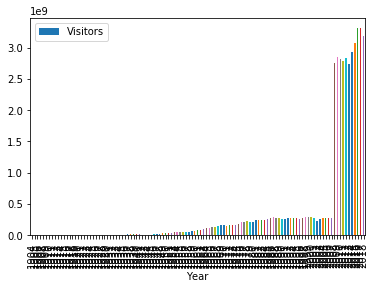

In [16]:
new_df.plot(kind='bar',x='Year',y='Visitors')
plt.show()

In [ ]:
#junk catcher cell
#This is just different things I have tried before getting the code that works.


visit = soup.findAll('div', class_='table-wrapper')
visit[2]
visit_pd = pd.read_html(visit)
visit_pd

years = [ int(x) for x in years ]
visitors = [ int(x) for x in visitors]

#numbers = [ int(x) for x in numbers ]
#years = map(int, years)
#results = map(int, results)

visit.rename(columns={0:"year1",
                      2:"year2",
                     4:"year3", 
                      6:"year4",
                     8:"year5"},
             inplace=True)
visit.head()

# apminder.rename(columns={'pop':'population',
#                           'lifeExp':'life_exp',
#                           'gdpPercap':'gdp_per_cap'}, 
#                  inplace=True)

del visitNum
visitNum = first.append(second)
visitNum
#df1.append(df2)
visitNum = pd.concat([first, second], keys=['year1', 'year2'])
visitNum
#pd.concat([x, y], keys=['x', 'y'])

first = visit[["year1",1]]
second = visit[["year2",3]]
first.head()


from sqlalchemy import create_engine
import pandas as pd

engine = sqlalchemy.create_engine('sqlite:///my.db', echo=False)
df = pd.DataFrame([[1,2],[1,2]], columns=['a', 'b'])

df.to_sql('mytable', con=engine, if_exists='append')

url = "https://www.nps.gov/aboutus/visitation-numbers.htm"
browser = Browser('chrome')
#browser = Browser.visit(url)
browser.visit(url)
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

# y_pos = new_df["Visitors"]
# x_pos = new_df["Year"]
# plt.bar(y_pos, x_pos, align='center', alpha=0.5)

# # objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
# # y_pos = np.arange(len(objects))
# # performance = [10,8,6,4,2,1]
 
# # plt.bar(y_pos, performance, align='center', alpha=0.5)
# # plt.xticks(y_pos, objects)
# # plt.ylabel('Usage')
# # plt.title('Programming language usage')

# ax = new_df[['Visitors', 'Year']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
# ax.set_xlabel("Hour", fontsize=12)
# ax.set_ylabel("V", fontsize=12)